## Download and import vader

In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.downloader.download('vader_lexicon')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yidanzhang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Import packages

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Read all data from news.csv with head (已整理Title, Date, Time) 
## TODO: 重新整理content

In [3]:
col_list = ["Title", "Date", "Time"]
parsed_data = pd.read_csv('news_updated.csv', usecols=col_list) 
parsed_data.head()

,Title,Date,Time
0,Bitcoin price hits $34K as trader forecasts fr...,2021-07-24,15:46:15
1,Bitcoin price hints at 'megaphone' bottom patt...,2021-07-24,13:42:02
2,Just HODL! Bitcoin and Ethereum outperform ‘lo...,2021-07-24,01:05:00
3,"Price analysis 7/23: BTC, ETH, BNB, ADA, XRP, ...",2021-07-23,18:26:09
4,Bitcoin payments for real estate gain traction...,2021-07-23,17:15:24


## Calculate Sentiment Scores

In [4]:
vader = SentimentIntensityAnalyzer()
scores = parsed_data['Title'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
scores_df.head()

,compound,neg,neu,pos
0,0.3182,0.0,0.813,0.187
1,0.0000,0.0,1.000,0.000
2,0.0000,0.0,1.000,0.000
3,0.0000,0.0,1.000,0.000
4,0.5267,0.0,0.764,0.236


## Add scores to original data frame

In [5]:
scored_news = parsed_data.join(scores_df, rsuffix='_right')
scored_news.head()

,Title,Date,Time,compound,neg,neu,pos
0,Bitcoin price hits $34K as trader forecasts fr...,2021-07-24,15:46:15,0.3182,0.0,0.813,0.187
1,Bitcoin price hints at 'megaphone' bottom patt...,2021-07-24,13:42:02,0.0000,0.0,1.000,0.000
2,Just HODL! Bitcoin and Ethereum outperform ‘lo...,2021-07-24,01:05:00,0.0000,0.0,1.000,0.000
3,"Price analysis 7/23: BTC, ETH, BNB, ADA, XRP, ...",2021-07-23,18:26:09,0.0000,0.0,1.000,0.000
4,Bitcoin payments for real estate gain traction...,2021-07-23,17:15:24,0.5267,0.0,0.764,0.236


## Read k_line.csv (price)

In [6]:
col_list_price = ["Time", "Price"]
parsed_price_data = pd.read_csv('k_line.txt') 
parsed_price_data.head()

,Time,Price
0,1514735940,13328.5
1,1514736000,13371.5
2,1514736060,13405.5
3,1514736120,13450.0
4,1514736180,13528.0


In [7]:
from datetime import datetime
parsed_price_data['Time'] = [datetime.fromtimestamp(x) for x in parsed_price_data['Time']]
parsed_price_data[['Date','Time']] = parsed_price_data['Time'].astype(str).str.split(' ',expand=True)
parsed_price_data

,Time,Price,Date
0,07:59:00,13328.5,2017-12-31
1,08:00:00,13371.5,2017-12-31
2,08:01:00,13405.5,2017-12-31
3,08:02:00,13450.0,2017-12-31
4,08:03:00,13528.0,2017-12-31
5,08:04:00,13616.0,2017-12-31
6,08:05:00,13683.0,2017-12-31
7,08:06:00,13705.0,2017-12-31
8,08:07:00,13687.0,2017-12-31
9,08:08:00,13690.0,2017-12-31


## 截取疫情前后两个时间段的数据 (news 和 prices)
* 2019/01/01 - 2019/06/30 --> mask1
* 2020/01/01 - 2020/06/30 --> mask2

### 2019/01/01 - 2019/06/30

In [8]:
scored_news['Date'] = pd.to_datetime(scored_news['Date'])
mask1 = (scored_news['Date'] >= '2019-1-1') & (scored_news['Date'] <= '2019-6-30')
train_data1 = scored_news.loc[mask1]
train_data1

,Title,Date,Time,compound,neg,neu,pos
7470,Cryptocurrency Mobile App Downloads Stall Amid...,2019-06-30,21:05:00,-0.2023,0.184,0.816,0.000
7471,"Hodler’s Digest, June 24–30: Top Stories, Pric...",2019-06-30,20:49:00,-0.2577,0.170,0.721,0.108
7472,25 Bitcoin Transactions Worth $6 Billion Inclu...,2019-06-30,19:15:00,-0.2500,0.227,0.625,0.148
7473,Bittrex User Alleges Funds Were Withheld in Re...,2019-06-30,17:36:00,-0.2263,0.192,0.808,0.000
7474,Bloomberg: Craig Wright Does Not Have Access t...,2019-06-28,21:40:00,0.0000,0.000,1.000,0.000
7475,Coinbase Releases Key Findings on Crypto Aware...,2019-06-28,18:03:00,0.0000,0.000,1.000,0.000
7476,"Iranian Authorities Confiscate 1,000 Bitcoin M...",2019-06-28,17:01:00,0.0000,0.000,1.000,0.000
7477,Trader Who Called Current Bitcoin Rally Warns ...,2019-06-28,12:49:00,-0.1027,0.113,0.887,0.000
7478,Edward Snowden Used Bitcoin to Pay for Servers...,2019-06-28,11:49:00,-0.4215,0.275,0.725,0.000
7479,Bitcoin Mining Is Now More Competitive Than Ev...,2019-06-28,10:08:00,0.2484,0.000,0.834,0.166


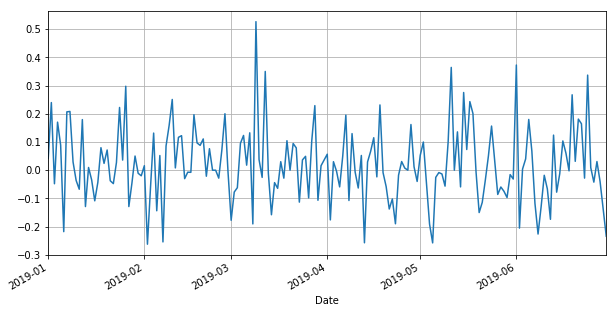

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]

mean_scores1 = train_data1.groupby(['Date']).mean()

mean_scores1 = mean_scores1.xs('compound', axis="columns").transpose()

mean_scores1.plot(kind = 'line')
plt.grid()

In [14]:
parsed_price_data['Date'] = pd.to_datetime(parsed_price_data['Date'])
price_mask1 = (parsed_price_data['Date'] >= '2019-1-1') & (parsed_price_data['Date'] <= '2019-6-30')
train_price_data1 = parsed_price_data.loc[price_mask1]
train_price_data1

,Time,Price,Date
529871,00:00:00,3703.0,2019-01-01
529872,00:01:00,3706.0,2019-01-01
529873,00:02:00,3705.0,2019-01-01
529874,00:03:00,3704.5,2019-01-01
529875,00:04:00,3704.0,2019-01-01
529876,00:05:00,3704.0,2019-01-01
529877,00:06:00,3704.0,2019-01-01
529878,00:07:00,3704.0,2019-01-01
529879,00:08:00,3704.0,2019-01-01
529880,00:09:00,3703.0,2019-01-01


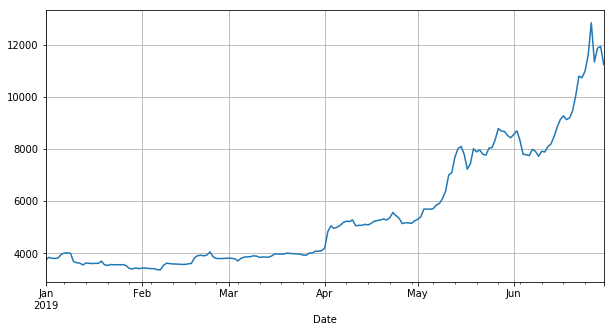

In [15]:
plt.rcParams['figure.figsize'] = [10, 5]

mean_prices1 = train_price_data1.groupby(['Date']).mean()

mean_prices1 = mean_prices1.xs('Price', axis="columns").transpose()

mean_prices1.plot(kind = 'line')
plt.grid()

### 2020/01/01 - 2020/06/30

In [16]:
scored_news['Date'] = pd.to_datetime(scored_news['Date'])
mask2 = (scored_news['Date'] >= '2020-1-1') & (scored_news['Date'] <= '2020-6-30')
train_data2 = scored_news.loc[mask2]
train_data2

,Title,Date,Time,compound,neg,neu,pos
3915,Survey Shows 42% of Investors Expect a $15K Bi...,2020-06-30,22:03:00,0.0000,0.000,1.000,0.000
3916,3 Reasons Why Bitcoin Price Recorded Its Third...,2020-06-30,20:17:00,0.6369,0.000,0.704,0.296
3917,Bitcoin Scam Exposes Thousands to Data Breach,2020-06-30,16:55:00,-0.6369,0.510,0.490,0.000
3918,An Israeli Blockchain Startup Claims It’s Inve...,2020-06-30,15:00:00,0.0000,0.000,1.000,0.000
3919,Max Keiser: US Hash Rate War With Iran Can Sen...,2020-06-30,14:20:00,-0.5994,0.231,0.769,0.000
3920,Gold vs. Bitcoin: $2.8B Fake Bullion Scam High...,2020-06-30,10:13:00,-0.6369,0.415,0.427,0.159
3921,Bitcoin Price Bulls Pin Hopes on Descending Ch...,2020-06-30,07:43:00,0.4215,0.000,0.781,0.219
3922,Bitcoin’s ROI Since 2015 Outperforms Five Majo...,2020-06-30,05:44:00,0.0000,0.000,1.000,0.000
3923,Researchers Say New Lightning Network Attack C...,2020-06-29,22:38:00,-0.2500,0.254,0.574,0.172
3924,Bitcoin as a Tool to Fight Authoritarian Regim...,2020-06-29,22:18:00,-0.5719,0.343,0.657,0.000


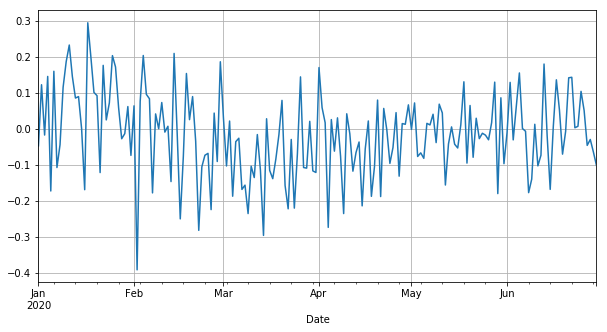

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]

mean_scores2 = train_data2.groupby(['Date']).mean()

mean_scores2 = mean_scores2.xs('compound', axis="columns").transpose()

mean_scores2.plot(kind = 'line')
plt.grid()

In [18]:
parsed_price_data['Date'] = pd.to_datetime(parsed_price_data['Date'])
price_mask2 = (parsed_price_data['Date'] >= '2020-1-1') & (parsed_price_data['Date'] <= '2020-6-30')
train_price_data2 = parsed_price_data.loc[price_mask2]
train_price_data2

,Time,Price,Date
1056201,00:00:00,7183.0,2020-01-01
1056202,00:01:00,7180.5,2020-01-01
1056203,00:02:00,7180.5,2020-01-01
1056204,00:03:00,7180.5,2020-01-01
1056205,00:04:00,7180.5,2020-01-01
1056206,00:05:00,7180.5,2020-01-01
1056207,00:06:00,7180.5,2020-01-01
1056208,00:07:00,7181.0,2020-01-01
1056209,00:08:00,7180.5,2020-01-01
1056210,00:09:00,7180.5,2020-01-01


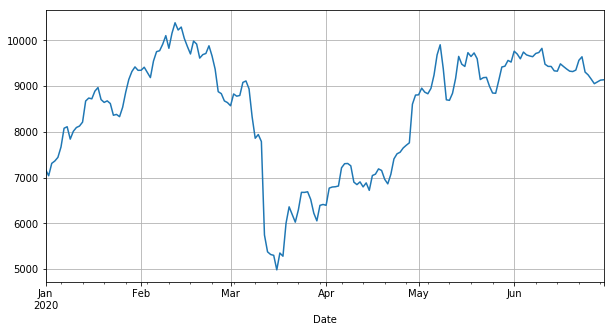

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]

mean_prices2 = train_price_data2.groupby(['Date']).mean()

mean_prices2 = mean_prices2.xs('Price', axis="columns").transpose()

mean_prices2.plot(kind = 'line')
plt.grid()

,Title,Date,Time,Content
0,Bitcoin price hits $34K as trader forecasts fr...,2021-07-24,15:46:15,"<p>Bitcoin (<a href=""https://cointelegraph.com..."
1,Bitcoin price hints at 'megaphone' bottom patt...,2021-07-24,13:42:02,"<p>Bitcoin's (<a href=""https://cointelegraph.c..."
2,Just HODL! Bitcoin and Ethereum outperform ‘lo...,2021-07-24,01:05:00,"<p>In the past two decades, index and exchange..."
3,"Price analysis 7/23: BTC, ETH, BNB, ADA, XRP, ...",2021-07-23,18:26:09,"<p>Bitcoin’s (<a href=""https://cointelegraph.c..."
4,Bitcoin payments for real estate gain traction...,2021-07-23,17:15:24,<p>Crypto investors are betting big on real es...
